# 1. Introduction 

In [1]:
# Import de toutes les librairies nécessaires au projet
import pandas as pd
import numpy as np
import time
import missingno as msno
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

# Pré-requis pyarrow : avoir installé la librairie, voir https://arrow.apache.org/docs/python/index.html
# Faire par exemple : pip install pyarrow
from pyarrow import csv

In [2]:
# Pré-requis : avoir téléchargé le dataset et l'avoir mis dans le même répertoire que le notebook
MyCSVFile = 'train.csv'
MyCSVDelimiter = ','

# Nous avons retenu le chargement avec pyarrow, plus rapide que l'import classique Pandas
def csv_file_2_dataframe(csv_file_path: str, csv_delimiter: str) -> pd.DataFrame:
    return csv.read_csv(csv_file_path, parse_options=csv.ParseOptions(delimiter=csv_delimiter)).to_pandas()

start_time = time.time()
df = csv_file_2_dataframe(MyCSVFile, MyCSVDelimiter)
print("Temps de chargement : "+format(time.time() - start_time))

Temps de chargement : 0.07801508903503418


In [3]:
# Vérification du chargement
print('Dimensions dataset : ', df.shape)
pd.set_option('display.max_columns', None)
df.head()

Dimensions dataset :  (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,,S


In [4]:
# On importe le fichier test
MyCSVFile = 'test.csv'
MyCSVDelimiter = ','
df_test = csv_file_2_dataframe(MyCSVFile, MyCSVDelimiter)

# 2. Pré-analyses et pre-processing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()
#df.describe().T

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Suppression des doublons
#df = df.drop_duplicates(keep="first")

### Gestion des valeurs manquantes

<AxesSubplot:>

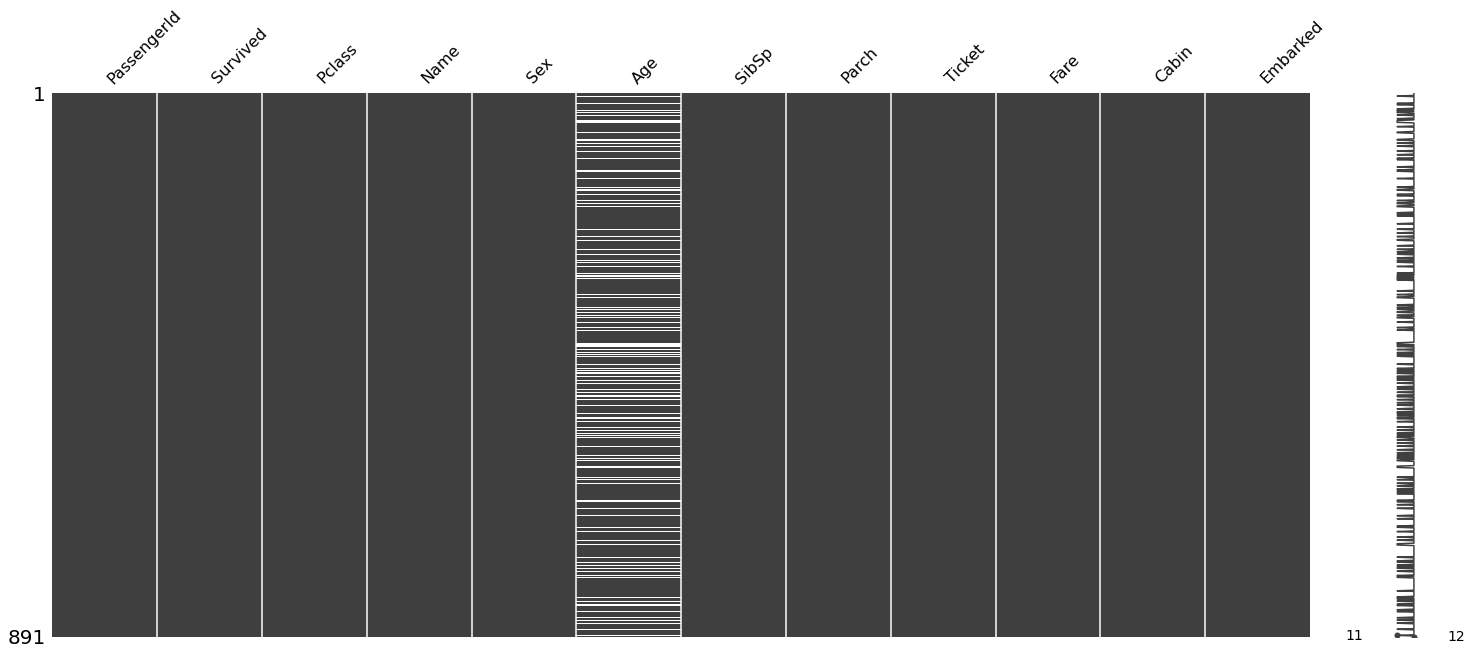

In [7]:
msno.matrix(df)

In [8]:
# Classement des variables selon leur taux de NaN
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df_analyse_nan = df.isnull().sum(axis = 0)/df.shape[0]
df_analyse_nan.sort_values(ascending=False)

Age           0.199
PassengerId   0.000
Survived      0.000
Pclass        0.000
Name          0.000
Sex           0.000
SibSp         0.000
Parch         0.000
Ticket        0.000
Fare          0.000
Cabin         0.000
Embarked      0.000
dtype: float64

In [9]:
#df = df.dropna(axis=0, how='any', subset=[''])
df[['Age']] = df[['Age']].fillna(df['Age'].mean())
df_test[['Age']] = df_test[['Age']].fillna(df_test['Age'].mean())
print(df['Age'].mean())

29.699117647058763


<AxesSubplot:>

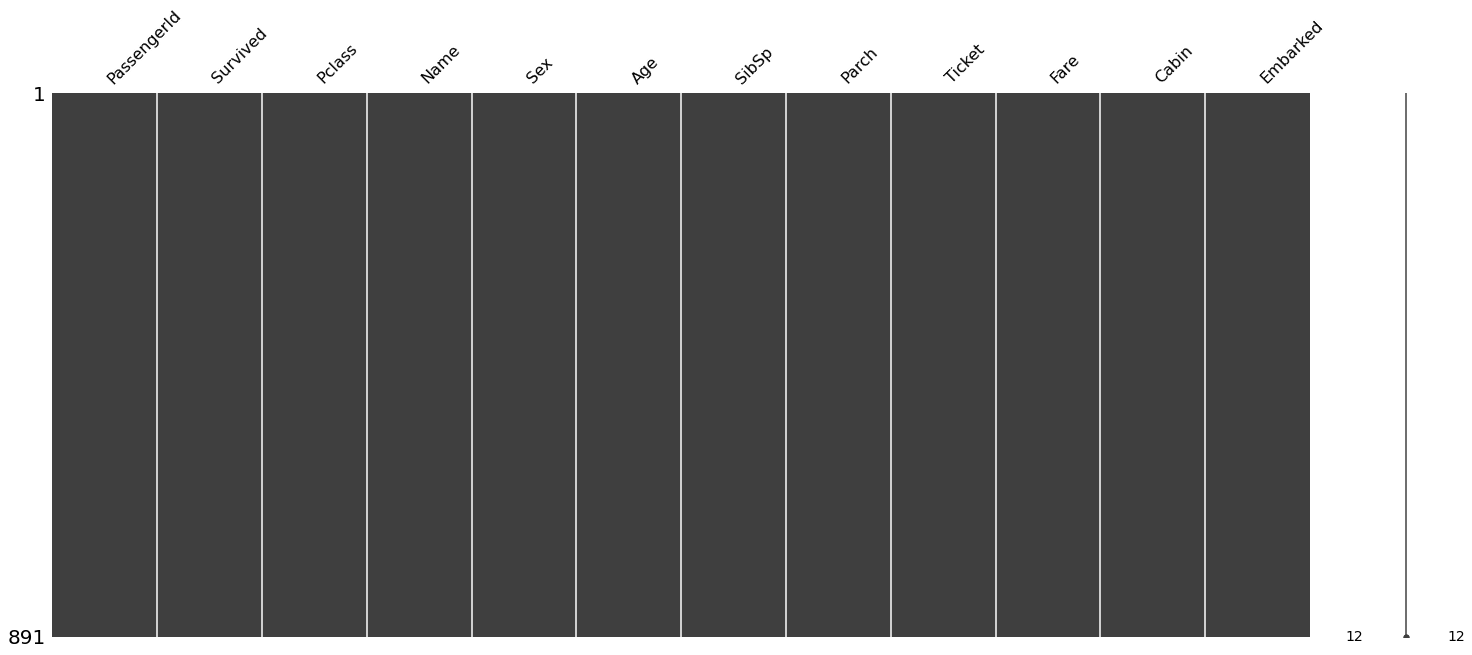

In [10]:
# Vérification visuelle du nettoyage
msno.matrix(df)

### Preprocessing

In [11]:
# Suppression d'autres variables 
df = df.drop(columns=['PassengerId','Name','Ticket'], axis=1)
df_test = df_test.drop(columns=['PassengerId','Name','Ticket'], axis=1)

In [12]:
df = df.dropna()
df_test = df_test.dropna()

In [13]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.000,1,0,7.250,,S
1,1,1,female,38.000,1,0,71.283,C85,C
2,1,3,female,26.000,0,0,7.925,,S
3,1,1,female,35.000,1,0,53.100,C123,S
4,0,3,male,35.000,0,0,8.050,,S


### Visualisations et statistiques

In [14]:
#liste des variables qualitatives
list=df.select_dtypes(include=['object']).columns
print(list)
#Dans un dataset, nous plaçons uniquement les variables qualitatives.
cat_data= df.select_dtypes(include='O')
cat_data.head(5)
# Analyse des variables catégorielles:

print(cat_data['Sex'].value_counts())

print(cat_data['Cabin'].value_counts())

print(cat_data['Cabin'].map(lambda x:x[0:1]).value_counts())

print(cat_data['Embarked'].value_counts())

Index(['Sex', 'Cabin', 'Embarked'], dtype='object')
male      577
female    314
Name: Sex, dtype: int64
               687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64
     687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64
S    644
C    168
Q     77
       2
Name: Embarked, dtype: int64


In [15]:
#liste des variables qualitatives
list=df_test.select_dtypes(include=['object']).columns
print(list)
#Dans un dataset, nous plaçons uniquement les variables qualitatives.
cat_data_test= df_test.select_dtypes(include='O')
cat_data_test.head(5)
# Analyse des variables catégorielles:

print(cat_data_test['Sex'].value_counts())

print(cat_data_test['Cabin'].value_counts())

print(cat_data_test['Cabin'].map(lambda x:x[0:1]).value_counts())

print(cat_data_test['Embarked'].value_counts())

Index(['Sex', 'Cabin', 'Embarked'], dtype='object')
male      265
female    152
Name: Sex, dtype: int64
                   326
B57 B59 B63 B66      3
C89                  2
C116                 2
C80                  2
                  ... 
E45                  1
E52                  1
B58 B60              1
C62 C64              1
C105                 1
Name: Cabin, Length: 77, dtype: int64
     326
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: Cabin, dtype: int64
S    269
C    102
Q     46
Name: Embarked, dtype: int64


C:\Users\paulj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


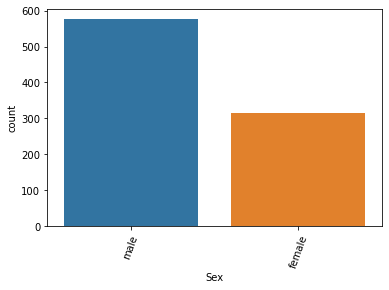

In [16]:
# Graphique des modes de carburant avant nettoyage des données => paragraphe 5.1.2
sns.countplot(df['Sex'])
plt.xticks(rotation= 70);



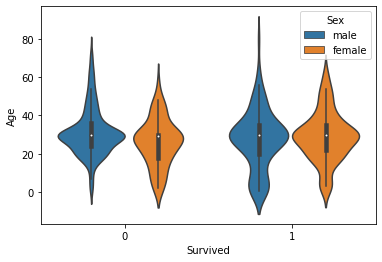

In [17]:
sns.violinplot(x="Survived", y="Age", hue='Sex', data=df)
plt.show()

C:\Users\paulj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


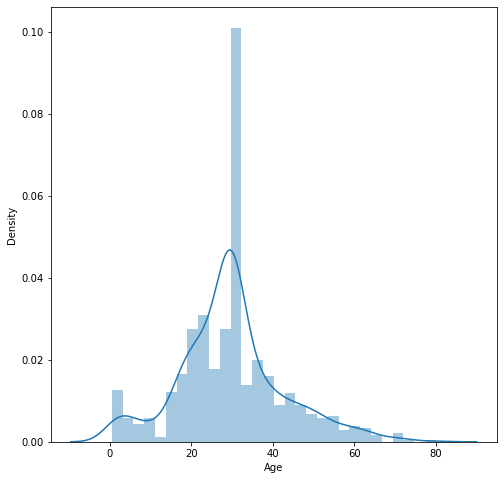

In [18]:
plt.figure(figsize=(8,8))
sns.distplot(df['Age'])
plt.show()

<AxesSubplot:>

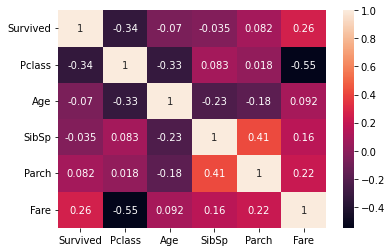

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.heatmap(df.corr(),annot=True)

### Suite du Preprocessing

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df_test['Sex'] = le.fit_transform(df_test['Sex'])

In [21]:
df['Cabin'] =df['Cabin'].map(lambda x:x[0:1])
df_test['Cabin'] =df_test['Cabin'].map(lambda x:x[0:1])

In [22]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.000,1,0,7.250,,S
1,1,1,0,38.000,1,0,71.283,C,C
2,1,3,0,26.000,0,0,7.925,,S
3,1,1,0,35.000,1,0,53.100,C,S
4,0,3,1,35.000,0,0,8.050,,S


In [23]:
df = pd.get_dummies(df)
df_test = pd.get_dummies(df_test)

In [24]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.000,1,0,7.250,1,0,0,0,0,0,0,0,0,0,0,0,1
1,1,1,0,38.000,1,0,71.283,0,0,0,1,0,0,0,0,0,0,1,0,0
2,1,3,0,26.000,0,0,7.925,1,0,0,0,0,0,0,0,0,0,0,0,1
3,1,1,0,35.000,1,0,53.100,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0,3,1,35.000,0,0,8.050,1,0,0,0,0,0,0,0,0,0,0,0,1


In [25]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Embarked_C,Embarked_Q,Embarked_S
0,3,1,34.500,0,0,7.829,1,0,0,0,0,0,0,0,0,1,0
1,3,0,47.000,1,0,7.000,1,0,0,0,0,0,0,0,0,0,1
2,2,1,62.000,0,0,9.688,1,0,0,0,0,0,0,0,0,1,0
3,3,1,27.000,0,0,8.662,1,0,0,0,0,0,0,0,0,0,1
4,3,0,22.000,1,1,12.287,1,0,0,0,0,0,0,0,0,0,1


In [26]:
# dernier ajustement
# ajout pour que ça colle avec le jeu de train
df_test['Cabin_T']=0
df_test['Embarked_']=0
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Embarked_C,Embarked_Q,Embarked_S,Cabin_T,Embarked_
0,3,1,34.500,0,0,7.829,1,0,0,0,0,0,0,0,0,1,0,0,0
1,3,0,47.000,1,0,7.000,1,0,0,0,0,0,0,0,0,0,1,0,0
2,2,1,62.000,0,0,9.688,1,0,0,0,0,0,0,0,0,1,0,0,0
3,3,1,27.000,0,0,8.662,1,0,0,0,0,0,0,0,0,0,1,0,0
4,3,0,22.000,1,1,12.287,1,0,0,0,0,0,0,0,0,0,1,0,0


In [27]:
print(df.shape)
print(df_test.shape)

(891, 20)
(417, 19)


In [28]:
# Sauvegarde du dataframe "clean" afin de pouvoir le réutiliser dans les notebook suivants
df.to_csv('train_2.csv',index_label='index')

In [29]:
# Vérification sauvegarde / chargement
df_verif = pd.read_csv('train_2.csv', index_col='index')
print('Dimensions dataset chargé :', df_verif.shape)
df_verif.head()

Dimensions dataset chargé : (891, 20)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_,Embarked_C,Embarked_Q,Embarked_S
index,,,,,,,,,,,,,,,,,,,,
0,0,3,1,22.000,1,0,7.250,1,0,0,0,0,0,0,0,0,0,0,0,1
1,1,1,0,38.000,1,0,71.283,0,0,0,1,0,0,0,0,0,0,1,0,0
2,1,3,0,26.000,0,0,7.925,1,0,0,0,0,0,0,0,0,0,0,0,1
3,1,1,0,35.000,1,0,53.100,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0,3,1,35.000,0,0,8.050,1,0,0,0,0,0,0,0,0,0,0,0,1


In [30]:
# Sauvegarde du dataframe "clean" afin de pouvoir le réutiliser dans les notebook suivants
df_test.to_csv('test_2.csv',index_label='index')
# Vérification sauvegarde / chargement
df_verif = pd.read_csv('test_2.csv', index_col='index')
print('Dimensions dataset chargé :', df_verif.shape)
df_verif.head()

Dimensions dataset chargé : (417, 19)


,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Embarked_C,Embarked_Q,Embarked_S,Cabin_T,Embarked_
index,,,,,,,,,,,,,,,,,,,
0,3,1,34.500,0,0,7.829,1,0,0,0,0,0,0,0,0,1,0,0,0
1,3,0,47.000,1,0,7.000,1,0,0,0,0,0,0,0,0,0,1,0,0
2,2,1,62.000,0,0,9.688,1,0,0,0,0,0,0,0,0,1,0,0,0
3,3,1,27.000,0,0,8.662,1,0,0,0,0,0,0,0,0,0,1,0,0
4,3,0,22.000,1,1,12.287,1,0,0,0,0,0,0,0,0,0,1,0,0
